In [ ]:
!pip install pycytominer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycytominer import feature_select
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, RocCurveDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Flatten,
    Activation, BatchNormalization, ReLU,
    Conv1D, Conv2D, AveragePooling1D, MaxPooling1D,GlobalAveragePooling1D,Add, TimeDistributed
)
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.regularizers import l2
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train :", train.shape)
print("test :", test.shape)
print("train colonne", train.columns)
print("test colonne", test.columns)

train : (3751, 1777)
test : (2501, 1776)
train colonne Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)
test colonne Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1776)


In [ ]:
train.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
colonnes = list(train.columns)
colonnes = colonnes[1:]
print(colonnes)

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69', 'D70', 'D71', 'D72', 'D73', 'D74', 'D75', 'D76', 'D77', 'D78', 'D79', 'D80', 'D81', 'D82', 'D83', 'D84', 'D85', 'D86', 'D87', 'D88', 'D89', 'D90', 'D91', 'D92', 'D93', 'D94', 'D95', 'D96', 'D97', 'D98', 'D99', 'D100', 'D101', 'D102', 'D103', 'D104', 'D105', 'D106', 'D107', 'D108', 'D109', 'D110', 'D111', 'D112', 'D113', 'D114', 'D115', 'D116', 'D117', 'D118', 'D119', 'D120', 'D121', 'D122', 'D123', 'D124', 'D125', 'D126', 'D127', 'D128', 'D129', 'D130', 'D131', 'D132', 'D133', 'D134', 'D135', 'D136', 'D137', 'D138', 'D1

In [ ]:
train[colonnes].corr()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
D1,1.000000,0.262487,0.328325,0.260002,-0.074244,0.366193,-0.430245,-0.112804,0.189056,-0.335096,...,0.260743,0.221889,0.224236,0.229257,0.225635,0.234814,0.096729,0.164529,0.237026,0.186957
D2,0.262487,1.000000,0.439590,0.352263,0.227328,-0.136386,-0.032891,0.141841,-0.354988,0.208848,...,0.012333,0.075043,0.015788,0.040128,0.045587,0.017283,0.023722,0.043174,0.027019,0.073585
D3,0.328325,0.439590,1.000000,0.188451,-0.123794,-0.040728,-0.204815,0.079161,-0.141597,-0.002482,...,0.049737,0.135849,0.037999,0.096788,0.122743,0.021355,0.053000,0.142170,0.008959,0.198354
D4,0.260002,0.352263,0.188451,1.000000,-0.012298,-0.001187,-0.063331,0.064062,-0.035721,0.041743,...,-0.006225,0.073802,-0.000540,0.040167,0.042837,-0.008171,0.014769,0.027448,0.008766,0.068058
D5,-0.074244,0.227328,-0.123794,-0.012298,1.000000,-0.030135,-0.113320,-0.461419,-0.203845,-0.062299,...,-0.146282,-0.108501,-0.105827,-0.126951,-0.116712,-0.118609,-0.097684,-0.105049,-0.137316,-0.102322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1772,0.234814,0.017283,0.021355,-0.008171,-0.118609,0.165540,-0.140998,-0.010961,0.143035,-0.143633,...,0.580641,0.329251,0.552293,0.562141,0.289023,1.000000,0.249335,0.101371,0.422945,0.262122
D1773,0.096729,0.023722,0.053000,0.014769,-0.097684,0.114388,-0.092395,0.021939,0.092533,-0.083466,...,0.430405,0.228236,0.214677,0.248383,0.243572,0.249335,1.000000,0.325325,0.293441,0.333455
D1774,0.164529,0.043174,0.142170,0.027448,-0.105049,0.124192,-0.089671,0.024235,0.087579,-0.074929,...,0.394892,0.295706,0.156499,0.305436,0.148392,0.101371,0.325325,1.000000,0.300667,0.411980
D1775,0.237026,0.027019,0.008959,0.008766,-0.137316,0.144459,-0.096429,0.019008,0.121252,-0.089828,...,0.548875,0.376011,0.403716,0.483157,0.368829,0.422945,0.293441,0.300667,1.000000,0.182508


In [ ]:
feature_select_ops = [
    "variance_threshold",
    "correlation_threshold",
    "drop_na_columns",
]
na_cut = 0.05
corr_threshold = 0.95
output_dir = "profiles"

profile_df = feature_select(
                profiles=train,#donner nom df entier
                operation=feature_select_ops,
                features=colonnes,  # liste des features
                na_cutoff=na_cut,
                corr_threshold=corr_threshold
            )
selected_features = list(set(colonnes) & set(profile_df.columns))
print(selected_features)
print(len(selected_features))

['D11', 'D103', 'D63', 'D52', 'D505', 'D106', 'D36', 'D102', 'D14', 'D86', 'D145', 'D32', 'D57', 'D105', 'D30', 'D33', 'D25', 'D8', 'D19', 'D91', 'D47', 'D88', 'D15', 'D75', 'D152', 'D10', 'D74', 'D951', 'D43', 'D6', 'D7', 'D67', 'D31', 'D104', 'D70', 'D34', 'D107', 'D49', 'D56', 'D26', 'D20', 'D89', 'D46', 'D54', 'D84', 'D39', 'D95', 'D38', 'D18', 'D9', 'D17', 'D99', 'D78', 'D100', 'D71', 'D66', 'D53', 'D62', 'D60', 'D73', 'D55', 'D87', 'D58', 'D65', 'D76', 'D5', 'D21', 'D35', 'D68', 'D16', 'D2', 'D61', 'D42', 'D911', 'D48', 'D44', 'D64', 'D69']
78


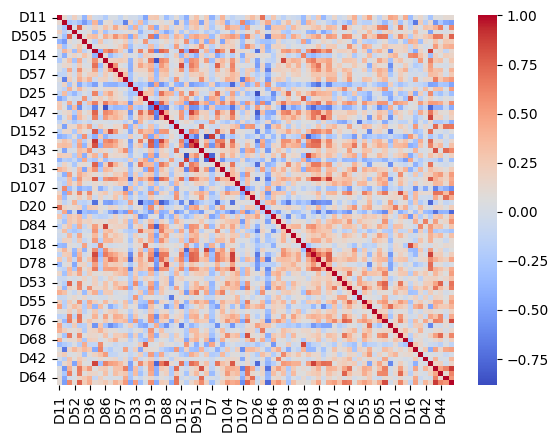

In [ ]:
sns.heatmap(train[selected_features].corr(), cmap="coolwarm")
plt.show()

In [ ]:
test_normalize = normalize(test[selected_features], norm='l2')
test_normalize = pd.DataFrame(test_normalize, columns=selected_features,index=test.index)
train_normalize=normalize(train[selected_features], norm='l2')
train_normalize = pd.DataFrame(train_normalize, columns=selected_features, index=train.index)
train_normalize["Activity"] = train["Activity"]

In [ ]:
test_normalize.head()

,D11,D103,D63,D52,D505,D106,D36,D102,D14,D86,...,D68,D16,D2,D61,D42,D911,D48,D44,D64,D69
0,0.031979,0.053184,0.088313,0.174764,0.117302,0.072710,0.000000,0.085519,0.041861,0.044309,...,0.034937,0.057710,0.188374,0.028698,0.000000,0.135749,0.106045,0.107554,0.000000,0.087655
1,0.043074,0.044646,0.039136,0.343940,0.038216,0.163866,0.032949,0.033018,0.063271,0.006776,...,0.000000,0.127950,0.260766,0.006466,0.000000,0.014789,0.064600,0.080725,0.057323,0.074446
2,0.105843,0.082922,0.032294,0.000000,0.012608,0.056822,0.000000,0.011295,0.048613,0.000000,...,0.021914,0.090677,0.262019,0.028198,0.032732,0.000000,0.016784,0.000000,0.033328,0.025851
3,0.041582,0.064845,0.038202,0.351559,0.022324,0.071958,0.000000,0.022394,0.044540,0.005414,...,0.038723,0.043104,0.230536,0.000000,0.000000,0.007559,0.010301,0.018879,0.027738,0.026894
4,0.000000,0.000396,0.094732,0.000000,0.050836,0.229604,0.024821,0.005284,0.177374,0.005765,...,0.000000,0.160566,0.194103,0.089193,0.035109,0.000000,0.018015,0.000000,0.020337,0.000000


In [ ]:
train_normalize.head()

,D11,D103,D63,D52,D505,D106,D36,D102,D14,D86,...,D16,D2,D61,D42,D911,D48,D44,D64,D69,Activity
0,0.067584,0.123727,0.000000,0.359763,0.000000,0.080524,0.0,0.075161,0.024824,0.010001,...,0.108567,0.178806,0.004209,0.0,0.058026,0.018060,0.033098,0.0,0.027090,1
1,0.031062,0.059540,0.077914,0.177380,0.111854,0.072177,0.0,0.093390,0.040137,0.047304,...,0.057422,0.185758,0.053700,0.0,0.141661,0.099426,0.095862,0.0,0.082344,1
2,0.071466,0.103160,0.000000,0.369241,0.011705,0.070669,0.0,0.040992,0.025441,0.003648,...,0.104616,0.177282,0.026179,0.0,0.035743,0.018905,0.000000,0.0,0.009120,1
3,0.000000,0.230969,0.000000,0.375881,0.000000,0.052865,0.0,0.048673,0.054859,0.000000,...,0.122254,0.202534,0.051532,0.0,0.004060,0.000000,0.000000,0.0,0.000000,1
4,0.185521,0.077285,0.059981,0.348554,0.016591,0.048808,0.0,0.020530,0.033078,0.018229,...,0.040702,0.180479,0.024712,0.0,0.011258,0.030673,0.056183,0.0,0.030603,0


In [ ]:
m = TSNE(learning_rate="auto")
tsne_feature = m.fit_transform(train_normalize)
train_normalize["x"] = tsne_feature[:, 0]
train_normalize["y"] = tsne_feature[:, 1]

In [ ]:
Y = train_normalize["Activity"]
X = train_normalize.drop(["Activity", "x", "y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

 Random Forest Features containing inner CV

In [ ]:
def forest_features_cv(X, y, n_splits=5, n_trees=300, random_state=42):
    """Generate out-of-fold forest predictions."""
    X, y = np.array(X), np.array(y)  # Convert inputs to numpy arrays
    rf_features = np.zeros((len(X), n_trees))  # Store tree predictions for each sample
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)  # Stratified CV setup

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        rf = RandomForestClassifier(n_estimators=n_trees, random_state=random_state, n_jobs=-1)  # Build RF
        rf.fit(X[train_idx], y[train_idx])  # Train on training fold
        rf_features[val_idx, :] = np.array([tree.predict(X[val_idx]) for tree in rf.estimators_]).T  # Tree preds
    return rf_features  # Return out-of-fold features




DNN model

In [ ]:
def build_fDNN(input_dim):
    # L2 regularization to prevent overfitting
    l2_reg = regularizers.l2(1e-4)

    # Define a feedforward deep neural network
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),  # Input layer

        layers.Dense(64, activation='relu', kernel_regularizer=l2_reg),  # Hidden layer 1
        layers.BatchNormalization(),  # Normalize activations
        layers.Dropout(0.5),  # Dropout for regularization

        layers.Dense(32, activation='relu', kernel_regularizer=l2_reg),  # Hidden layer 2
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(8, activation='relu', kernel_regularizer=l2_reg),  # Hidden layer 3
        layers.BatchNormalization(),

        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile model with Adam optimizer and binary cross-entropy loss
    model.compile(
        optimizer=optimizers.Adam(learning_rate=5e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model  # Return the compiled model



outer CV and Training

In [ ]:
# Cross-validation and model parameters
outer_splits = 5
inner_splits = 5
n_trees = 300
batch_size = 64
epochs = 50

# Outer CV for model evaluation
outer_cv = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=42)
accs, aucs = [], []

fold_num = 1
for train_idx, val_idx in outer_cv.split(X_train, y_train):
    print(f"\n=== Outer Fold {fold_num}/{outer_splits} ===")

    # Split into training and validation sets for this fold
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Generate out-of-fold Random Forest features for training
    F_tr = forest_features_cv(X_tr, y_tr, n_splits=inner_splits, n_trees=n_trees)

    # Train a full RF on all training data to create validation features
    rf_full = RandomForestClassifier(n_estimators=n_trees, random_state=42, n_jobs=-1)
    rf_full.fit(X_tr, y_tr)
    F_val = np.array([tree.predict(X_val) for tree in rf_full.estimators_]).T

    # One-hot encode tree predictions
    enc = OneHotEncoder(sparse_output=False)
    F_tr_enc = enc.fit_transform(F_tr)
    F_val_enc = enc.transform(F_val)

    # Build and train the deep neural network
    model = build_fDNN(F_tr_enc.shape[1])
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        F_tr_enc, y_tr,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )

    # Predict on validation fold
    y_val_pred_proba = model.predict(F_val_enc).ravel()
    y_val_pred = (y_val_pred_proba > 0.5).astype(int)

    # Evaluate performance
    acc = accuracy_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, y_val_pred_proba)
    accs.append(acc)
    aucs.append(auc)

    print(f"Fold {fold_num} Accuracy: {acc:.3f} | AUC: {auc:.3f}")
    fold_num += 1



=== Outer Fold 1/5 ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold 1 Accuracy: 0.757 | AUC: 0.815

=== Outer Fold 2/5 ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold 2 Accuracy: 0.758 | AUC: 0.831

=== Outer Fold 3/5 ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold 3 Accuracy: 0.752 | AUC: 0.802

=== Outer Fold 4/5 ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Fold 4 Accuracy: 0.765 | AUC: 0.845

=== Outer Fold 5/5 ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold 5 Accuracy: 0.802 | AUC: 0.873


Plot Training Loss and Accuracy per Fold

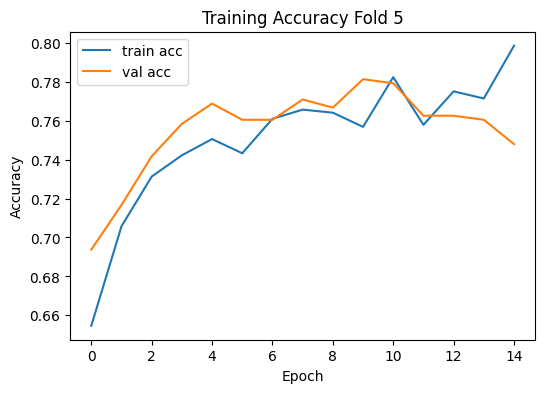

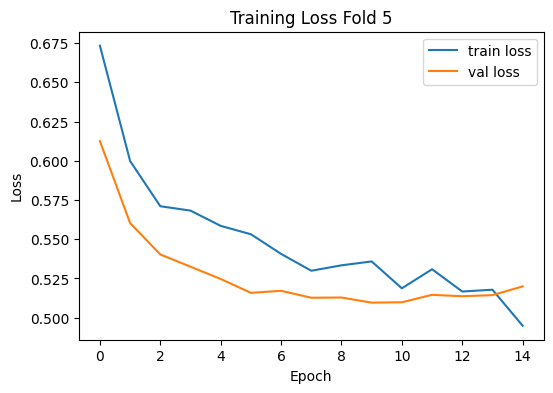

In [ ]:
    # Training accuracy
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(f'Training Accuracy Fold {fold_num-1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Training loss
    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'Training Loss Fold {fold_num - 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()




In [ ]:
benchmark = pd.read_csv("svm_benchmark.csv")
benchmark.head()
print(benchmark.shape)
print("test :", test.shape)

(2501, 2)
test : (2501, 1776)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


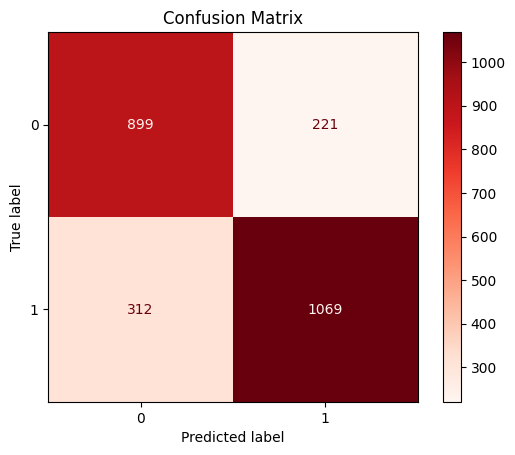

Accuracy     : 0.7869
Sensitivity  : 0.7741
Specificity  : 0.8027
Precision    : 0.8287
F1-score     : 0.8004

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1120
           1       0.83      0.77      0.80      1381

    accuracy                           0.79      2501
   macro avg       0.79      0.79      0.79      2501
weighted avg       0.79      0.79      0.79      2501

Balanced Accuracy: 0.7884
MCC              : 0.5739


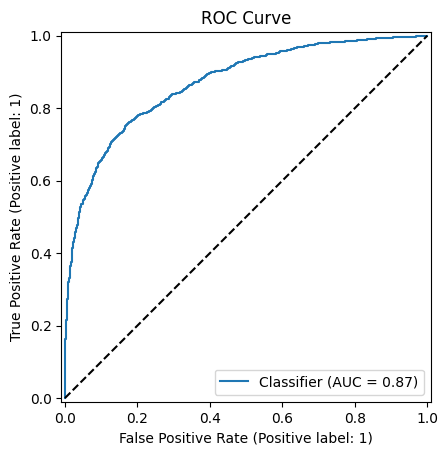

AUC: 0.8696


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, RocCurveDisplay,
    classification_report, balanced_accuracy_score, matthews_corrcoef
)

# 1. Predictions
# Generate forest features for test data using the trained random forest model (rf_full from the previous cell)
F_test = np.array([tree.predict(test_normalize[selected_features]) for tree in rf_full.estimators_]).T

# One-hot encode the test forest features using the same encoder fitted on the training data (enc from the previous cell)
F_test_enc = enc.transform(F_test)

# Make predictions using the DNN model
predict_regloss = model.predict(F_test_enc)
y_pred = (predict_regloss > 0.5).astype(int).ravel()
y_true = (benchmark['PredictedProbability'] > 0.5).astype(int).values

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

# 3. Basic Metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = (2 * TP) / ((2 * TP) + FP + FN)

print(f"Accuracy     : {accuracy:.4f}")
print(f"Sensitivity  : {sensitivity:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"F1-score     : {f1_score:.4f}")

# 4. Optional Extended Metrics
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print(f"Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):.4f}")
print(f"MCC              : {matthews_corrcoef(y_true, y_pred):.4f}")

# 5. ROC & AUC
y_score = predict_regloss.ravel()
roc_display = RocCurveDisplay.from_predictions(y_true, y_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.show()

auc = roc_auc_score(y_true, y_score)
print(f"AUC: {auc:.4f}")